In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
train_data = pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\4\Hw4\Reduced Fashion-MNIST\Reduced Fashion-MNIST/Train_Data.csv').values
train_labels =pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\4\Hw4\Reduced Fashion-MNIST\Reduced Fashion-MNIST/Train_Labels.csv').values
test_data = pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\4\Hw4\Reduced Fashion-MNIST\Reduced Fashion-MNIST/Test_Data.csv').values
test_labels = pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\4\Hw4\Reduced Fashion-MNIST\Reduced Fashion-MNIST/test_Labels.csv').values

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
n=9999
X=train_data.copy()

In [4]:
def center(X):
    X = np.array(X)
    
    mean = X.mean(axis=1, keepdims=True)
    
    return X- mean

In [5]:
X=center(X)
cov = np.cov(X.T)

In [6]:
eig_vals, eig_vecs = np.linalg.eig(cov)

In [7]:
eigs=np.sort(np.real(np.round(eig_vals, 3)))[::-1]

(0.0, 20.0)

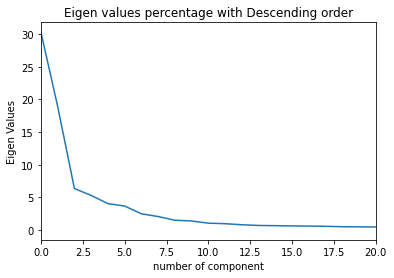

In [8]:
v=eigs/np.sum(eigs)*100
plt.plot(range(182),v)
plt.xlabel('number of component')
plt.ylabel('Eigen Values')
plt.title("Eigen values percentage with Descending order")
plt.xlim([0,20])

In [9]:
for i in range(182):
    a=np.sum(v[:i])
    if(a>80):
        print(' Optimal Number of components:',i+1)   
        break

 Optimal Number of components: 16


# Error _Number of components

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
clf = GaussianNB()

In [11]:
X_test=test_data.copy()
X_test=center(X_test)
CCR=np.zeros(182)
for k in range(182):
#     X_test=test_data.copy()
    pca_components=k+1 
    X_new=X.dot(eig_vecs[0:pca_components].T)
    Y_test=X_test.dot(eig_vecs[0:pca_components].T)
    clf.fit(X_new, train_labels.ravel())
    CCR[k]=accuracy_score(test_labels, clf.predict(Y_test))
# CCR

(0.0, 150.0)

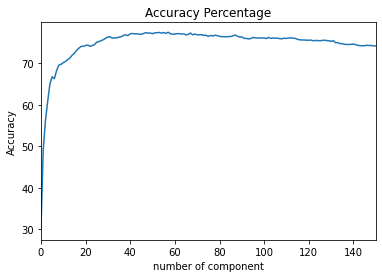

In [12]:
plt.plot(range(182),CCR*100)
plt.title('Accuracy Percentage')
plt.xlabel('number of component')
plt.ylabel('Accuracy')
plt.xlim([0,150])

# Optimal Number of PCs

In [13]:
pca_components=16

In [14]:
X_new=X.dot(eig_vecs[0:pca_components].T)

In [15]:
X_test=test_data.copy()
X_test=center(X_test)
X_test=X_test.dot(eig_vecs[0:pca_components].T)

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
clf = GaussianNB()
clf.fit(X_new, train_labels.ravel())

GaussianNB()

In [17]:
print(classification_report(test_labels, clf.predict(X_test), target_names=class_names))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       329
           1       1.00      0.84      0.91       346
           2       0.61      0.56      0.58       367
           3       0.71      0.79      0.75       375
           4       0.64      0.62      0.63       365
           5       0.70      0.73      0.72       350
           6       0.37      0.32      0.34       322
           7       0.79      0.83      0.81       331
           8       0.86      0.86      0.86       369
           9       0.85      0.92      0.88       345

    accuracy                           0.72      3499
   macro avg       0.72      0.72      0.72      3499
weighted avg       0.72      0.72      0.72      3499



<AxesSubplot:>

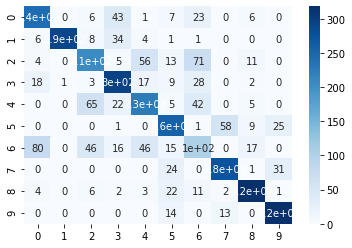

In [18]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(test_labels, clf.predict(X_test))
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,cmap='Blues')